In [37]:
import pandas as pd
df=pd.read_csv(r"C:\Users\preet\Downloads\gold_price_data.csv")
print(df.head())

         date       open       high        low      close  adj_close    volume
0  2004-11-18  44.380001  44.380001  44.490002  44.070000  44.430000   5992000
1  2004-11-19  44.779999  44.779999  44.919998  44.470001  44.490002  11655300
2  2004-11-22  44.950001  44.950001  44.970001  44.740002  44.750000  11996000
3  2004-11-23  44.750000  44.750000  44.919998  44.720001  44.880001   3169200
4  2004-11-24  45.049999  45.049999  45.049999  44.790001  44.930000   6105100


In [38]:
print(df.shape)

(5215, 7)


In [39]:
print(df.columns.tolist())


['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']


In [40]:
print(df.isnull().sum())

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64


In [41]:
print(df.duplicated().sum())

0


In [42]:
print(df.dropna())

            date        open        high         low       close   adj_close  \
0     2004-11-18   44.380001   44.380001   44.490002   44.070000   44.430000   
1     2004-11-19   44.779999   44.779999   44.919998   44.470001   44.490002   
2     2004-11-22   44.950001   44.950001   44.970001   44.740002   44.750000   
3     2004-11-23   44.750000   44.750000   44.919998   44.720001   44.880001   
4     2004-11-24   45.049999   45.049999   45.049999   44.790001   44.930000   
5     2004-11-26   45.290001   45.290001   45.599998   45.060001   45.250000   
6     2004-11-29   45.400002   45.400002   45.500000   45.080002   45.099998   
7     2004-11-30   45.119999   45.119999   45.410000   44.820000   45.369999   
8     2004-12-01   45.380001   45.380001   45.590000   45.259998   45.279999   
9     2004-12-02   44.950001   44.950001   45.570000   44.680000   45.549999   
10    2004-12-03   45.599998   45.599998   46.000000   44.799999   45.040001   
11    2004-12-06   45.169998   45.169998

In [43]:
print(df.drop_duplicates())

            date        open        high         low       close   adj_close  \
0     2004-11-18   44.380001   44.380001   44.490002   44.070000   44.430000   
1     2004-11-19   44.779999   44.779999   44.919998   44.470001   44.490002   
2     2004-11-22   44.950001   44.950001   44.970001   44.740002   44.750000   
3     2004-11-23   44.750000   44.750000   44.919998   44.720001   44.880001   
4     2004-11-24   45.049999   45.049999   45.049999   44.790001   44.930000   
5     2004-11-26   45.290001   45.290001   45.599998   45.060001   45.250000   
6     2004-11-29   45.400002   45.400002   45.500000   45.080002   45.099998   
7     2004-11-30   45.119999   45.119999   45.410000   44.820000   45.369999   
8     2004-12-01   45.380001   45.380001   45.590000   45.259998   45.279999   
9     2004-12-02   44.950001   44.950001   45.570000   44.680000   45.549999   
10    2004-12-03   45.599998   45.599998   46.000000   44.799999   45.040001   
11    2004-12-06   45.169998   45.169998

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df.describe())

              open         high          low        close    adj_close  \
count  5215.000000  5215.000000  5215.000000  5215.000000  5215.000000   
mean    131.940968   131.940968   132.570993   131.256556   131.939183   
std      51.291094    51.291094    51.459284    51.073175    51.282084   
min      41.259998    41.259998    41.360001    41.020000    41.029999   
25%     104.730000   104.730000   105.355000   104.160000   104.754997   
50%     124.400002   124.400002   124.870003   123.980003   124.459999   
75%     164.779999   164.779999   165.489998   164.004997   164.544998   
max     316.290009   316.290009   317.630005   315.040009   317.489990   

             volume  
count  5.215000e+03  
mean   9.423568e+06  
std    6.645282e+06  
min    3.193000e+05  
25%    5.305150e+06  
50%    7.818800e+06  
75%    1.154915e+07  
max    9.380420e+07  


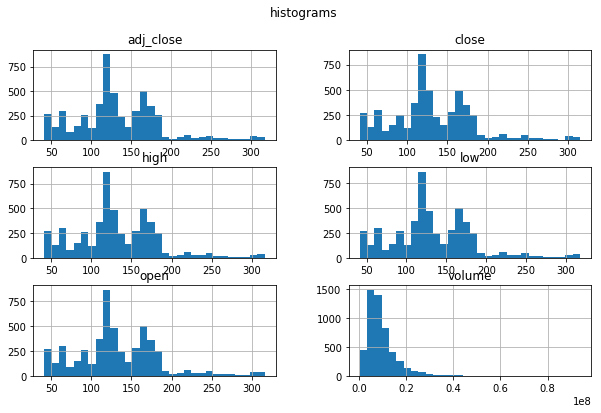

In [45]:
df.hist(figsize=(10,6),bins=30)
plt.suptitle("histograms")
plt.show()


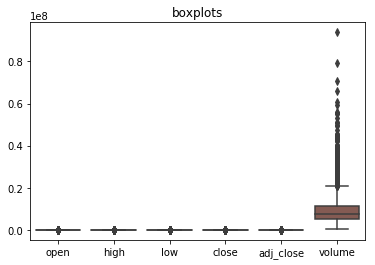

In [46]:
sns.boxplot(data=df)
plt.title("boxplots")
plt.show()

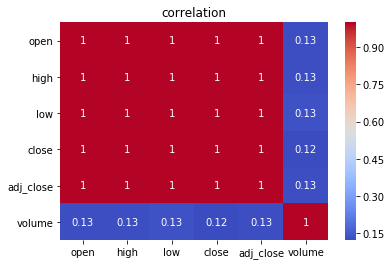

In [47]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("correlation")
plt.show()

In [48]:
from sklearn.model_selection import train_test_split


X = df[['open', 'high', 'low', 'close']]


y = df['volume']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)



Training set size: (4172, 4)
Testing set size: (1043, 4)


In [49]:
print(df.columns)

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Squared Error (MSE): 21436297948024.03
Root Mean Squared Error (RMSE): 4629934.983131408
R² Score: 0.5253586097089524


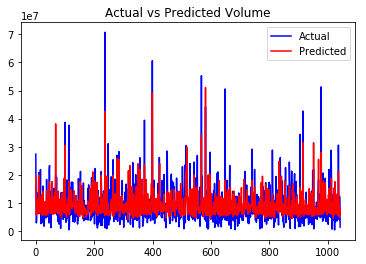

In [51]:
import matplotlib.pyplot as plt

plt.plot(y_test.values, label="Actual", color="blue")
plt.plot(y_pred, label="Predicted", color="red")
plt.legend()
plt.title("Actual vs Predicted Volume")
plt.show()


In [52]:
import pandas as pd


coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
})


coefficients = coefficients.reindex(coefficients.Coefficient.abs().sort_values(ascending=False).index)

print(coefficients)


  Feature   Coefficient
2     low  5.103385e+06
3   close -4.915035e+06
1    high -1.050800e+05
0    open -1.050800e+05
